# Building a Movie recommender

In [1]:
%matplotlib inline

import pandas
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

import numpy as np
import time
from sklearn.externals import joblib
import Recommenders as Recommenders

# Load Movie Ratings data

In [2]:
#Read userid-movieId-rating triplets
#This step might take time to download data from external sources
# triplets_file = 'https://static.turi.com/datasets/millionmovie/10000.txt'
# movies_metadata_file = 'https://static.turi.com/datasets/millionmovie/movie_data.csv'

movie_df_1 = pandas.read_csv('./ratings.csv')
# movie_df_1.columns = ['user_id', 'movie_id', 'listen_count']

#Read movie  metadata
# movie_df_2 =  pandas.read_csv(movies_metadata_file)

#Merge the two dataframes above to create input dataframe for recommender systems
# movie_df = pandas.merge(movie_df_1, movie_df_2.drop_duplicates(['movie_id']), on="movie_id", how="left") 

In [3]:
print(movie_df_1.head())
len(movie_df_1)

   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205


100004

In [4]:
movie_df = movie_df_1

# Explore data

Music data shows how many times a user listened to a movie, as well as the details of the movie.

In [5]:
movie_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

## Length of the dataset

In [6]:
print(len(movie_df))
movie_df = movie_df.head(10000)
print(len(movie_df))

100004
10000


## Create a subset of the dataset

In [7]:
movie_df = movie_df.head(10000)

#Merge movie title and artist_name columns to make a merged column
# movie_df['movie'] = movie_df['title'].map(str) + " - " + movie_df['artist_name']

## Showing the most popular movies in the dataset

In [8]:
movie_grouped = movie_df.groupby(['movieId']).agg({'rating': 'count'}).reset_index()

In [9]:
movie_grouped.head()

,movieId,rating
0,1,21
1,2,11
2,3,5
3,4,1
4,5,6


In [10]:
grouped_sum = movie_grouped['rating'].sum()

In [11]:
print(grouped_sum)


10000


In [12]:
movie_grouped['percentage']  = movie_grouped['rating'].div(grouped_sum)*100
movie_grouped.sort_values(['rating', 'movieId'], ascending = [0,1])

,movieId,rating,percentage
220,356,33,0.33
182,296,32,0.32
160,260,30,0.30
193,318,28,0.28
315,527,27,0.27
346,593,27,0.27
74,110,25,0.25
288,480,25,0.25
587,1196,25,0.25
273,457,24,0.24


In [13]:
movie_grouped = movie_df.groupby(['movieId']).agg({'rating': 'count'}).reset_index()
grouped_sum = movie_grouped['rating'].sum()
print(grouped_sum)
movie_grouped['percentage']  = movie_grouped['rating'].div(grouped_sum)*100
movie_grouped.sort_values(['rating', 'movieId'], ascending = [0,1])

10000


,movieId,rating,percentage
220,356,33,0.33
182,296,32,0.32
160,260,30,0.30
193,318,28,0.28
315,527,27,0.27
346,593,27,0.27
74,110,25,0.25
288,480,25,0.25
587,1196,25,0.25
273,457,24,0.24


## Count number of unique users in the dataset

In [14]:
users = movie_df['userId'].unique()

In [15]:
len(users)

70

## Quiz 1. Count the number of unique movies in the dataset

In [16]:
###Fill in the code here
movies = movie_df['movieId'].unique()
len(movies)

3622

In [17]:
movie_g = movie_grouped.sort_values(['rating', 'movieId'], ascending = [0,1])

In [18]:
movie_g['Rank'] = movie_g['rating'].rank(ascending=0, method='first')

In [19]:
movie_g

,movieId,rating,percentage,Rank
220,356,33,0.33,1.0
182,296,32,0.32,2.0
160,260,30,0.30,3.0
193,318,28,0.28,4.0
315,527,27,0.27,5.0
346,593,27,0.27,6.0
74,110,25,0.25,7.0
288,480,25,0.25,8.0
587,1196,25,0.25,9.0
273,457,24,0.24,10.0


In [20]:
popularity_recommendations = movie_g.head(10)

In [21]:
user_recommendations = popularity_recommendations

In [22]:
user_recommendations

,movieId,rating,percentage,Rank
220,356,33,0.33,1.0
182,296,32,0.32,2.0
160,260,30,0.30,3.0
193,318,28,0.28,4.0
315,527,27,0.27,5.0
346,593,27,0.27,6.0
74,110,25,0.25,7.0
288,480,25,0.25,8.0
587,1196,25,0.25,9.0
273,457,24,0.24,10.0


In [23]:
user_id = users[20]
user_recommendations['userId'] = user_id

C:\Users\gopin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
user_recommendations

,movieId,rating,percentage,Rank,userId
220,356,33,0.33,1.0,21
182,296,32,0.32,2.0,21
160,260,30,0.30,3.0,21
193,318,28,0.28,4.0,21
315,527,27,0.27,5.0,21
346,593,27,0.27,6.0,21
74,110,25,0.25,7.0,21
288,480,25,0.25,8.0,21
587,1196,25,0.25,9.0,21
273,457,24,0.24,10.0,21


In [25]:
cols = user_recommendations.columns.tolist()

In [26]:
cols

['movieId', 'rating', 'percentage', 'Rank', 'userId']

In [27]:
cols = cols[-1:] + cols[:-1]

In [28]:
cols

['userId', 'movieId', 'rating', 'percentage', 'Rank']

In [29]:
user_recommendations = user_recommendations[cols]

In [30]:
user_recommendations

,userId,movieId,rating,percentage,Rank
220,21,356,33,0.33,1.0
182,21,296,32,0.32,2.0
160,21,260,30,0.30,3.0
193,21,318,28,0.28,4.0
315,21,527,27,0.27,5.0
346,21,593,27,0.27,6.0
74,21,110,25,0.25,7.0
288,21,480,25,0.25,8.0
587,21,1196,25,0.25,9.0
273,21,457,24,0.24,10.0


# Create a movie recommender

In [31]:
train_data, test_data = train_test_split(movie_df, test_size = 0.20, random_state=0)
train_data.head()

,userId,movieId,rating,timestamp
7389,48,364,4.0,1319745852
9275,61,4306,3.5,1216050580
2995,17,7116,4.5,1127470554
5316,30,1346,4.0,945295052
356,5,231,3.5,1163373762


## Simple popularity-based recommender class (Can be used as a black box)

### Create an instance of popularity based recommender class

In [32]:
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'userId', 'movieId')

### Use the popularity model to make some predictions

In [33]:
user_id = users[20]
pm.recommend(user_id)

,userId,movieId,score,Rank
208,21,356,28,1.0
172,21,296,27,2.0
297,21,527,25,3.0
150,21,260,24,4.0
271,21,480,23,5.0
327,21,593,23,6.0
72,21,110,22,7.0
258,21,457,22,8.0
1123,21,2571,21,9.0
183,21,318,20,10.0


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

In [34]:
user_id = users[7]
pm.recommend(user_id)

,userId,movieId,score,Rank
208,8,356,28,1.0
172,8,296,27,2.0
297,8,527,25,3.0
150,8,260,24,4.0
271,8,480,23,5.0
327,8,593,23,6.0
72,8,110,22,7.0
258,8,457,22,8.0
1123,8,2571,21,9.0
183,8,318,20,10.0


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

### Quiz 2: Use the popularity based model to make predictions for the following user id (Note the difference in recommendations from the first user id).

In [35]:
###Fill in the code here
user_id = users[8]
pm.recommend(user_id)


,userId,movieId,score,Rank
208,9,356,28,1.0
172,9,296,27,2.0
297,9,527,25,3.0
150,9,260,24,4.0
271,9,480,23,5.0
327,9,593,23,6.0
72,9,110,22,7.0
258,9,457,22,8.0
1123,9,2571,21,9.0
183,9,318,20,10.0


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

## Build a movie recommender with personalization

We now create an item similarity based collaborative filtering model that allows us to make personalized recommendations to each user. 

## Class for an item similarity based personalized recommender system

### Create an instance of item similarity based recommender class

In [36]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'userId', 'movieId')

### Use the personalized model to make some movie recommendations

In [37]:
#Print the movies for the user in training data
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data movies for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend movies for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data movies for the user userid: 6:
------------------------------------------------------------------------------------
3751
1639
1285
2761
903
2529
1687
2072
2571
2502
1747
3300
158
1204
2890
173
3052
7090
2174
2001
596
4641
3114
2528
2692
1876
1259
1250
8784
4975
2723
8874
7361
8636
2019
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 35
no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :51060


,userId,movieId,score,rank
0,6.0,4370.0,0.217317,1.0
1,6.0,5445.0,0.217297,2.0
2,6.0,2011.0,0.202060,3.0
3,6.0,5464.0,0.199766,4.0
4,6.0,1266.0,0.196773,5.0
5,6.0,3504.0,0.194175,6.0
6,6.0,2115.0,0.192329,7.0
7,6.0,32587.0,0.191537,8.0
8,6.0,5679.0,0.190797,9.0
9,6.0,5989.0,0.189695,10.0


In [38]:
user_id

6

In [39]:
user_id = users[5]

In [40]:
user_data = train_data[train_data['userId'] == user_id]

In [41]:
user_data

,userId,movieId,rating,timestamp
484,6,3751,1.5,1109258190
463,6,1639,2.0,1109258179
461,6,1285,4.5,1108134339
479,6,2761,4.5,1108134545
456,6,903,4.0,1108134299
474,6,2529,4.0,1108134293
464,6,1687,2.0,1109258281
470,6,2072,4.0,1109258285
475,6,2571,1.0,1109258202
472,6,2502,3.5,1108134291


In [42]:
user_items = list(user_data['movieId'].unique())

In [43]:
user_items

[3751,
 1639,
 1285,
 2761,
 903,
 2529,
 1687,
 2072,
 2571,
 2502,
 1747,
 3300,
 158,
 1204,
 2890,
 173,
 3052,
 7090,
 2174,
 2001,
 596,
 4641,
 3114,
 2528,
 2692,
 1876,
 1259,
 1250,
 8784,
 4975,
 2723,
 8874,
 7361,
 8636,
 2019]

In [44]:
#A. Get all unique songs for this user
########################################
user_data = train_data[train_data['userId'] == user_id]
user_songs = list(user_data['movieId'].unique())    
            
print("No. of unique songs for the user: %d" % len(user_songs))
       
#B. Get all unique items (songs) in the training data
######################################################
all_songs = list(train_data['movieId'].unique())
        
print("no. of unique songs in the training set: %d" % len(all_songs))

No. of unique songs for the user: 35
no. of unique songs in the training set: 3215


In [45]:
###############################################
#C. Construct item cooccurence matrix of size 
#len(user_songs) X len(songs)
###############################################
####################################
#Get users for all songs in user_songs.
##############################################


user_songs_users = []        
for i in range(0, len(user_songs)):
    
    item_data = train_data[train_data['movieId'] == user_songs[i]]
    item_users = set(item_data['userId'].unique())
    user_songs_users.append(item_users)
            


In [46]:
user_songs_users

[{6, 14, 15, 23, 30, 37, 48, 59, 61},
 {6, 12, 15, 27, 45, 52, 63},
 {4, 6, 19, 33, 56},
 {6, 13, 15, 53, 56},
 {5, 6, 15, 17, 19, 23, 28, 30, 45},
 {6, 12, 30, 34, 41},
 {6, 26},
 {6, 56, 58},
 {6,
  8,
  9,
  10,
  13,
  15,
  17,
  20,
  22,
  23,
  26,
  28,
  29,
  30,
  31,
  41,
  42,
  48,
  61,
  63,
  66},
 {6, 8, 15, 17, 22, 23, 27, 31, 56, 61},
 {6, 15, 30},
 {6, 15, 22, 41},
 {6, 22, 32, 61, 69},
 {6, 15, 19, 20, 23, 34},
 {6, 10, 15, 23, 30},
 {4, 6, 22, 41, 49},
 {6, 22, 43, 45},
 {6, 15, 17, 23},
 {4, 6, 22, 30, 57, 60, 68},
 {6, 30, 41, 57},
 {4, 6, 19, 30, 61, 69},
 {6, 15, 23, 33},
 {5, 6, 13, 14, 15, 23, 43, 48, 56, 61, 63},
 {6, 15, 30, 34, 41},
 {6, 15, 17, 26, 31, 59},
 {6, 8, 15, 22, 23, 30, 41},
 {6, 8, 13, 19, 21, 30, 33, 34, 56, 57, 63},
 {6, 21, 23, 28, 30, 56},
 {6, 8, 15, 26, 48, 56},
 {6, 22, 23, 33, 48},
 {4, 6, 22},
 {6, 8, 26, 40, 56},
 {3, 6, 8, 13, 15, 17, 40, 48, 56, 68, 69},
 {5, 6, 15, 22, 23, 42, 48, 68},
 {6, 15, 19, 23, 28}]

In [47]:
###############################################
#Initialize the item cooccurence matrix of size 
#len(user_songs) X len(songs)
###############################################
cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)

In [48]:
cooccurence_matrix.shape

(35, 3215)

In [49]:
#############################################################
#Calculate similarity between user songs and all unique songs
#in the training data
#############################################################
for i in range(0,len(all_songs)):
    #Calculate unique listeners (users) of song (item) i
    songs_i_data = train_data[train_data['movieId'] == all_songs[i]]
    users_i = set(songs_i_data['userId'].unique())

    for j in range(0,len(user_songs)):       

        #Get unique listeners (users) of song (item) j
        users_j = user_songs_users[j]

        #Calculate intersection of listeners of songs i and j
        users_intersection = users_i.intersection(users_j)

        #Calculate cooccurence_matrix[i,j] as Jaccard Index
        if len(users_intersection) != 0:
            #Calculate union of listeners of songs i and j
            users_union = users_i.union(users_j)

            cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
        else:
            cooccurence_matrix[j,i] = 0

In [50]:
cooccurence_matrix

matrix([[0.22222222, 0.3125    , 0.        , ..., 0.11111111, 0.        ,
         0.11111111],
        [0.05263158, 0.11764706, 0.        , ..., 0.14285714, 0.        ,
         0.        ],
        [0.125     , 0.0625    , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.14285714, 0.35294118, 0.09090909, ..., 0.09090909, 0.        ,
         0.        ],
        [0.16666667, 0.17647059, 0.        , ..., 0.125     , 0.        ,
         0.        ],
        [0.125     , 0.0625    , 0.        , ..., 0.2       , 0.        ,
         0.        ]])

In [51]:
for i in range(0,len(all_songs)):
    #Calculate unique listeners (users) of song (item) i
    songs_i_data = train_data[train_data['movieId'] == all_songs[i]]
    users_i = set(songs_i_data['userId'].unique())

In [52]:
songs_i_data

,userId,movieId,rating,timestamp
5874,30,4496,4.0,1002770429


In [53]:
users_i

{30}

In [54]:
#Calculate a weighted average of the scores in cooccurence matrix for all user songs.

user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])

In [55]:
user_sim_scores = np.array(user_sim_scores)[0].tolist()

In [56]:
#Sort the indices of user_sim_scores based upon their value
#Also maintain the corresponding score

sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)

In [57]:
sort_index

[(0.3125974025974026, 463),
 (0.2971902700474129, 1651),
 (0.2920469213326356, 99),
 (0.2868480725623583, 1699),
 (0.28547642833357123, 438),
 (0.2827584320441463, 1236),
 (0.27948004376575797, 1659),
 (0.27166761809618956, 1184),
 (0.2549926264211978, 475),
 (0.25292180903982153, 151),
 (0.25233892158261906, 278),
 (0.2496101758834678, 337),
 (0.2437916810587618, 939),
 (0.23732417908888495, 129),
 (0.23672430743859313, 810),
 (0.2343821637299898, 7),
 (0.23403424387896438, 1598),
 (0.22543075971647403, 1923),
 (0.22173398030540886, 23),
 (0.2202691897271729, 982),
 (0.21731704803133375, 1375),
 (0.2172965922965923, 751),
 (0.21229901051329625, 1370),
 (0.21035412827338287, 223),
 (0.20765706343346085, 306),
 (0.20478695907267333, 1490),
 (0.20341859727574013, 60),
 (0.20205966657464644, 1013),
 (0.20032718215491327, 899),
 (0.19984363628901444, 698),
 (0.19976602762317053, 1862),
 (0.19697706870998793, 526),
 (0.1967733439783129, 1199),
 (0.1962141826427541, 1026),
 (0.19554544489327

In [64]:
#Create a dataframe from the following
columns = ['userId', 'movieId', 'score', 'rank']
#index = np.arange(1) # array of numbers for the number of samples
df = pandas.DataFrame(columns=columns)

In [65]:
df

,userId,movieId,score,rank


In [66]:
#Fill the dataframe with top 10 item based recommendations
rank = 1 
for i in range(0,len(sort_index)):
    if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
        df.loc[len(df)]=[user_id,all_songs[sort_index[i][1]],sort_index[i][0],rank]
        rank = rank+1

In [67]:
#Handle the case where there are no recommendations
if df.shape[0] == 0:
    print("The current user has no songs for training the item similarity based recommendation model.")
else:
    print(df)

   userId  movieId     score  rank
0     6.0   4370.0  0.217317   1.0
1     6.0   5445.0  0.217297   2.0
2     6.0   2011.0  0.202060   3.0
3     6.0   5464.0  0.199766   4.0
4     6.0   1266.0  0.196773   5.0
5     6.0   3504.0  0.194175   6.0
6     6.0   2115.0  0.192329   7.0
7     6.0  32587.0  0.191537   8.0
8     6.0   5679.0  0.190797   9.0
9     6.0   5989.0  0.189695  10.0


In [62]:
df = df.drop(df.index)

In [63]:
df

,userId,movieId,score,rank


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

### Quiz 3. Use the personalized model to make recommendations for the following user id. (Note the difference in recommendations from the first user id.)

In [0]:
user_id = users[7]
#Fill in the code here
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data movies for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend movies for the user using personalized model
is_model.recommend(user_id)


------------------------------------------------------------------------------------
Training data movies for the user userid: 8:
------------------------------------------------------------------------------------
2324
1302
2791
2770
2502
6377
2762
8784
8533
1754
2100
47
457
8874
1291
2716
1625
5378
1219
33493
43871
44004
42007
6874
4896
33166
805
1225
7361
527
1552
5064
45
5464
2959
4262
2423
593
3147
2804
2858
5445
2139
1387
6879
2571
7143
1674
4993
4973
5669
1500
1358
1393
296
282
32587
1198
32
4011
8873
6870
5989
3948
5630
40819
4226
43556
7153
628
260
3996
2194
2302
858
1258
6378
1259
1196
520
4963
1265
4034
1777
2841
1876
356
1270
5952
1197
33794
1210
3578
50
2918
524
1704
318
4448
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 99
no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :17518

,userId,movieId,score,rank
0,8.0,3504.0,0.223966,1.0
1,8.0,2011.0,0.220599,2.0
2,8.0,4027.0,0.218883,3.0
3,8.0,1263.0,0.215293,4.0
4,8.0,4370.0,0.214656,5.0
5,8.0,2329.0,0.212200,6.0
6,8.0,1213.0,0.211557,7.0
7,8.0,1266.0,0.208475,8.0
8,8.0,5679.0,0.208072,9.0
9,8.0,2115.0,0.207023,10.0


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

### We can also apply the model to find similar movies to any movie in the dataset

In [0]:
is_model.get_similar_items([2324])

no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :1856


,userId,movieId,score,rank
0,,4973,0.545455,1
1,,55247,0.500000,2
2,,8784,0.444444,3
3,,926,0.428571,4
4,,6953,0.428571,5
5,,5952,0.428571,6
6,,46578,0.428571,7
7,,51540,0.428571,8
8,,8807,0.428571,9
9,,67734,0.428571,10


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

In [0]:
movie = 47
###Fill in the code here
is_model.get_similar_items([movie])

no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :2596


,userId,movieId,score,rank
0,,1213,0.500000,1
1,,50,0.450000,2
2,,1252,0.437500,3
3,,1263,0.437500,4
4,,1244,0.428571,5
5,,1270,0.428571,6
6,,593,0.423077,7
7,,608,0.421053,8
8,,4973,0.411765,9
9,,4226,0.411765,10


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

## Quantitative comparison between the models

In [0]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:69
Length of user sample:3
Getting recommendations for user:51
No. of unique songs for the user: 24
no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :26590
Getting recommendations for user:55
No. of unique songs for the user: 24
no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :29372
Getting recommendations for user:6
No. of unique songs for the user: 35
no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :51060
8.51924753189087


In [68]:
#Find users common between training and test set
users_test_and_training = list(set(test_data['userId'].unique()).intersection(set(train_data['userId'].unique())))
print("Length of user_test_and_training:%d" % len(users_test_and_training))

Length of user_test_and_training:69


In [74]:
#Take only random user_sample of users for evaluations
user_sample = 0.05
import random
k = int(len(users_test_and_training) * user_sample)

In [75]:
random.seed(0)
indicies = random.sample(range(len(users_test_and_training)), k)
users_test_sample = [users_test_and_training[i] for i in indicies]

print("Length of user sample:%d" % len(users_test_sample))

Length of user sample:3


In [76]:
ism_training_dict = dict()
pm_training_dict = dict()
test_dict = dict()

In [77]:
#Method to generate recommendations for users in the user test sample
#For these test_sample users, get top 10 recommendations from training set
#self.ism_training_dict = {}
#self.pm_training_dict = {}
#self.test_dict = {}

for user_id in users_test_sample:
    #Get items for user_id from item similarity model
    print("Getting recommendations for user:%s" % user_id)
    user_sim_items = is_model.recommend(user_id)
    ism_training_dict[user_id] = list(user_sim_items['movieId'])

    #Get items for user_id from popularity model
    user_sim_items = pm.recommend(user_id)
    pm_training_dict[user_id] = list(user_sim_items['movieId'])

    #Get items for user_id from test_data
    test_data_user = test_data[test_data['userId'] == user_id]
    test_dict[user_id] = set(test_data_user['movieId'].unique())

Getting recommendations for user:51
No. of unique songs for the user: 24
no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :26590
Getting recommendations for user:55
No. of unique songs for the user: 24
no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :29372
Getting recommendations for user:6
No. of unique songs for the user: 35
no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :51060


In [78]:
#Calculate precision and recall at different cutoff values
#for popularity mode (pm) as well as item similarity model (ism)

In [122]:
#Method to calculate the precision and recall measures
#Create cutoff list for precision and recall calculation
cutoff_list = list(range(1,11))


#For each distinct cutoff:
#    1. For each distinct user, calculate precision and recall.
#    2. Calculate average precision and recall.

ism_avg_precision_list = []
ism_avg_recall_list = []
pm_avg_precision_list = []
pm_avg_recall_list = []


num_users_sample = len(users_test_sample)
for N in cutoff_list:
    ism_sum_precision = 0
    ism_sum_recall = 0
    pm_sum_precision = 0
    pm_sum_recall = 0
    ism_avg_precision = 0
    ism_avg_recall = 0
    pm_avg_precision = 0
    pm_avg_recall = 0

    for user_id in users_test_sample:
        ism_hitset = test_dict[user_id].intersection(set(ism_training_dict[user_id][0:N]))
        pm_hitset = test_dict[user_id].intersection(set(pm_training_dict[user_id][0:N]))
        testset = test_dict[user_id]

        pm_sum_precision += float(len(pm_hitset))/float(N)
        pm_sum_recall += float(len(pm_hitset))/float(len(testset))

        ism_sum_recall += float(len(ism_hitset))/float(len(testset))
        ism_sum_precision += float(len(ism_hitset))/float(N)

    pm_avg_precision = pm_sum_precision/float(num_users_sample)
    pm_avg_recall = pm_sum_recall/float(num_users_sample)

    ism_avg_precision = ism_sum_precision/float(num_users_sample)
    ism_avg_recall = ism_sum_recall/float(num_users_sample)

    ism_avg_precision_list.append(ism_avg_precision)
    ism_avg_recall_list.append(ism_avg_recall)

    pm_avg_precision_list.append(pm_avg_precision)
    pm_avg_recall_list.append(pm_avg_recall)

In [123]:
pm_avg_precision_list

[0.0,
 0.0,
 0.0,
 0.08333333333333333,
 0.06666666666666667,
 0.05555555555555555,
 0.047619047619047616,
 0.041666666666666664,
 0.037037037037037035,
 0.03333333333333333]

In [124]:
pm_avg_recall_list

[0.0,
 0.0,
 0.0,
 0.023809523809523808,
 0.023809523809523808,
 0.023809523809523808,
 0.023809523809523808,
 0.023809523809523808,
 0.023809523809523808,
 0.023809523809523808]

In [125]:
ism_avg_precision_list

[0.0,
 0.16666666666666666,
 0.1111111111111111,
 0.08333333333333333,
 0.06666666666666667,
 0.1111111111111111,
 0.09523809523809523,
 0.08333333333333333,
 0.07407407407407407,
 0.06666666666666667]

In [126]:
ism_avg_recall_list

[0.0,
 0.023809523809523808,
 0.023809523809523808,
 0.023809523809523808,
 0.023809523809523808,
 0.047619047619047616,
 0.047619047619047616,
 0.047619047619047616,
 0.047619047619047616,
 0.047619047619047616]

In [79]:
cutoff_list = list(range(1,11))

In [80]:
cutoff_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
test_dict[user_id].intersection(set(ism_training_dict[user_id][0:N]))

In [81]:
ism_training_dict[user_id]

[4370.0,
 5445.0,
 2011.0,
 5464.0,
 1266.0,
 3504.0,
 2115.0,
 32587.0,
 5679.0,
 5989.0]

In [109]:
user_id = 51

In [83]:
ism_training_dict

{51: [2424.0,
  2952.0,
  2702.0,
  4344.0,
  3006.0,
  4167.0,
  3618.0,
  2729.0,
  5991.0,
  4007.0],
 55: [628.0, 802.0, 762.0, 748.0, 880.0, 7.0, 14.0, 785.0, 852.0, 743.0],
 6: [4370.0,
  5445.0,
  2011.0,
  5464.0,
  1266.0,
  3504.0,
  2115.0,
  32587.0,
  5679.0,
  5989.0]}

In [85]:
ism_training_dict[user_id][0:10]

[4370.0,
 5445.0,
 2011.0,
 5464.0,
 1266.0,
 3504.0,
 2115.0,
 32587.0,
 5679.0,
 5989.0]

In [86]:
test_dict[user_id]

{111, 293, 1276, 1358, 1909, 2657, 5952, 7153, 8368}

In [87]:
set(ism_training_dict[user_id][0:1])

{4370.0}

In [88]:
test_dict

{51: {1636, 2701, 2761, 2763, 2841, 2881, 3175},
 55: {1, 7, 74, 112, 260, 494, 609, 653, 736, 737, 761, 780, 802, 1073},
 6: {111, 293, 1276, 1358, 1909, 2657, 5952, 7153, 8368}}

In [110]:
test_dict[user_id].intersection(set(ism_training_dict[user_id][0:1]))

set()

In [121]:
test_dict[user_id].intersection(set(ism_training_dict[user_id][0:10]))

set()

In [112]:
test_dict[user_id].intersection(set(pm_training_dict[user_id][0:10]))

set()

In [127]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.2])
    pl.xlim([0.0, 0.2])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


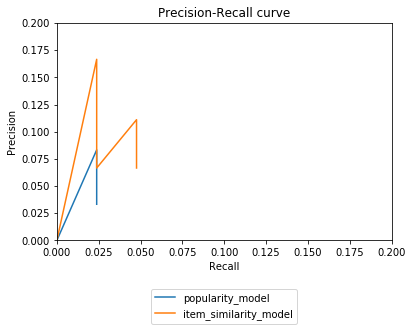

In [128]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")